### Assignment 4 --Simple Linear Regression

#### Q1. Problem Statement

Delivery_time -> Predict delivery time using sorting time 

Dataset: delivery_time.csv

In [1]:
#Loading the Required Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading the Dataset
Data = pd.read_csv("C:/Users/Akaash/Downloads/delivery_time.csv")
Data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### Renaming the Column
Because of Spaces between Column Names

In [3]:
#rename the Delivery Time & Sorting Time column axis=1 perform it based on column 
Dataset = Data.rename({'Delivery Time': 'Delivery_Time','Sorting Time': 'Sorting_Time'}, axis=1)
Dataset.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
#Checking NA Values
Dataset.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

Inference: No NA Values are present in the Data

#### Declare the X & Y Variable
--> As we need to predict Delivery Time in this Case So,

--> Y is Delivery_Time (Dependent)

--> X is Sorting_Time (Independent)

--> Delivery_Time ~ Sorting_Time

#### Correlation

In [5]:
#Using corr()
Dataset.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


Inference: 

As it can be seen Correlation between Delivery_Time and Sorting_Time is 0.82 which indicates Positively Strong Correlation

Also this prove Sorting_Time is required to Predict Delivery_Time

#### Plotting -- Distribution

<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

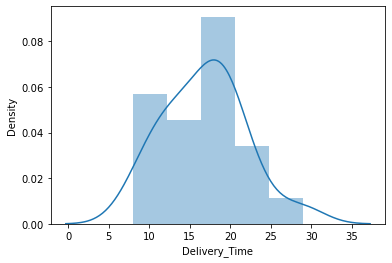

In [6]:
#Distribution Plot for Deliver_Time feature
sns.distplot(Dataset["Delivery_Time"])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

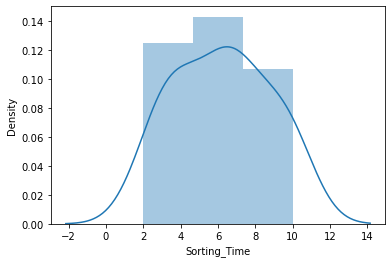

In [7]:
#Distribution Plot for Sorting_Time feature
sns.distplot(Dataset["Sorting_Time"])

Inference:

Delivery_Time: Distribution is not normal for Delivery_Time,as seems to be slighty Bimodel on the right hand side, and has positive skewness

Sorting_Time: It Follows Normal Distribution.

#### Model Building --Fitting a Linear Regression model

In [8]:
#Building the model
import statsmodels.formula.api as smf
model = smf.ols('Delivery_Time~Sorting_Time',data = Dataset).fit()

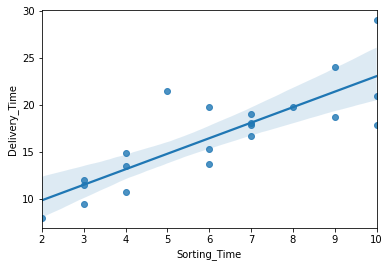

In [9]:
#Best Fit line
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=Dataset);

In [10]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

Inference: Intercept is B0 = 6.5, Sorting_Time is B1 = 1.64

In [11]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 P_values is:  
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


#### Hypothesis in SLR

B0 = Beta0 , B1 = Beta1

H0: B1 = 0, B1--> Slope is Zero Y is not Dependent

H1: B1 ≠ 0, B1--> Slope is not Zero Y is Dependent

In [12]:
#Hypothesis Test of SLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and Y is Dependent")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and Y is not Dependent")

p_value is: 3.983049566687783e-06 , Reject H0,Slope is not Zero and Y is Dependent


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

Inference: R_squared is 0.68 so the model is a okay Good model

### Test to Check Presence of Heteroscedasticity

#### Breusch-Pagan Test

Hypothesis of Breusch-Pagan Test 

H0 --> Homoscedasticity is present

H1 --> Homoscedasticity is absent thus Heteroscedasticity is present

In [14]:
#### Breusch-Pagan Test (gives 4 values,2nd value is p_value)
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(model.resid,model.model.exog)
print(test[1])

#Hypothesis of Breusch-Pagan Test
α = 0.05  # Standard
if test[1] < α:
    print("p_value is:",test[1],", Reject H0,Homoscedasticity is absent thus Heteroscedasticity is present")
else:
    print("p_value is:",test[1],", Fail to Reject H0, Homoscedasticity is Present")

0.1671695921495315
p_value is: 0.1671695921495315 , Fail to Reject H0, Homoscedasticity is Present


Inference: Through hypothesis of Breusch-Pagan Test Indicates that Homoscedasticity is present and not heteroscedasticity, We can also visualize this using the Residual plots.

### Residual Plot for Homoscedasticity/Heteroscedasticity

#### (Fitted VS Residuals, (Ei vsY^) )

In [15]:
#Defining a Function For Standardization Value.
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

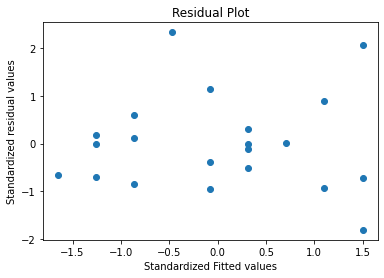

In [16]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [17]:
model.resid.mean()

-2.1147105230955362e-15

Inference: Through Residual plot, it seems the residual are scatter equally which means the variance is constant, and also the mean of residual is zero So the Y Variable is indeed has Homoscedasticity effect and not Heteroscedasticity effect

#### Predict for new data point

In [18]:
#Predict for 12 and 15 Sorting_Time circulation
newdata=pd.DataFrame(np.array([12,15]),columns = ["Sorting_Time"])
newdata

,Sorting_Time
0,12
1,15


In [19]:
#Predicting 
model.predict(newdata)

0    26.370973
1    31.318032
dtype: float64

Inference: 

For 12 Sorting_Time, Delivery_Time will be 26

For 15 Sorting_Time, Delivery_Time will be 31

#### Manually  Calculating and Checking the regression equation of the model

In [20]:
# Y = B0 + B1X

#B0 = 6.58 - from Build model
#B1 = 1.64  - from Build model
#X = 15    - Datapoint to Predict

Y = 6.58 + 1.64*15
Y

31.18

Inference:

Manually Also Its gives the approx the Same results as the Regression equation built by the Model

#### Q2. Problem Statement

Salary_hike -> Build a prediction model for Salary_hike

Dataset: Salary_Data.csv

In [21]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/Salary_Data.csv")
Dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
#Checking NA Values
Dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Inference: No NA Values are present in the Data

#### Declare the X & Y Variable
--> As we need to predict Salary_hike in this Case So,

--> Y is Salary (Dependent)

--> X is YearsExperience (Independent)

--> Salary ~ YearsExperience

#### Correlation

In [23]:
#Using corr()
Dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Inference: 

As it can be seen Correlation between YearsExperience and Salary is 0.97 which indicates Positively Strong Correlation

Also this prove YearsExperience is required to Predict Salary_hike

#### Plotting -- Distribution

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

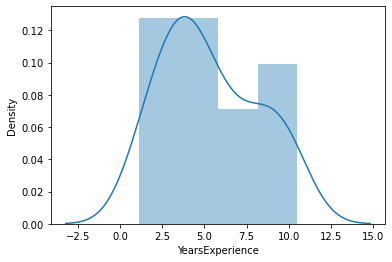

In [24]:
#Distribution Plot for YearsExperience feature
sns.distplot(Dataset["YearsExperience"])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

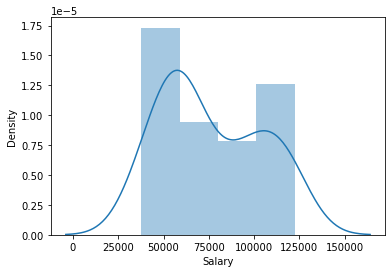

In [25]:
#Distribution Plot for Salary feature
sns.distplot(Dataset["Salary"])

Inference:

YearsExperience, Salary: Distribution is not normal for both the features, it also seems to be slighty Bimodel on the right hand side, and has positive skewness

#### Model Building --Fitting a Linear Regression model

In [26]:
#Building the model
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience',data = Dataset).fit()

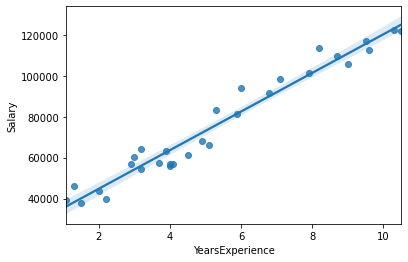

In [27]:
#Best Fit line
sns.regplot(x="YearsExperience", y="Salary", data=Dataset);

In [28]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

Inference: Intercept is B0 = 25792.2, YearsExperience is B1 = 9449.9

In [29]:
#t and p-Values
print("T_values is: ","\n",model.tvalues,"\n","P_values is: ",'\n', model.pvalues)

T_values is:  
 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 P_values is:  
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


#### Hypothesis in SLR

B0 = Beta0 , B1 = Beta1

H0: B1 = 0, B1--> Slope is Zero Y is not Dependent

H1: B1 ≠ 0, B1--> Slope is not Zero Y is Dependent

In [30]:
#Hypothesis Test of SLR model
α = 0.05  # Standard

if model.pvalues[1] < α:
    print("p_value is:",model.pvalues[1],", Reject H0,Slope is not Zero and Y is Dependent")
else:
    print("p_value is:",model.pvalues[1],", Fail to Reject H0,Slope is Zero and Y is not Dependent")

p_value is: 1.1430681092271316e-20 , Reject H0,Slope is not Zero and Y is Dependent


In [31]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

Inference: R_squared is 0.95 so the model is a very Good model

### Test to Check Presence of Heteroscedasticity

#### Breusch-Pagan Test

Hypothesis of Breusch-Pagan Test 

H0 --> Homoscedasticity is present

H1 --> Homoscedasticity is absent thus Heteroscedasticity is present

In [32]:
#### Breusch-Pagan Test (gives 4 values,2nd value is p_value)
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(model.resid,model.model.exog)
print(test[1])

#Hypothesis of Breusch-Pagan Test
α = 0.05  # Standard
if test[1] < α:
    print("p_value is:",test[1],", Reject H0,Homoscedasticity is absent thus Heteroscedasticity is present")
else:
    print("p_value is:",test[1],", Fail to Reject H0, Homoscedasticity is Present")

0.5275785890839342
p_value is: 0.5275785890839342 , Fail to Reject H0, Homoscedasticity is Present


Inference: Through hypothesis of Breusch-Pagan Test Indicates that Homoscedasticity is present and not heteroscedasticity, We can also visualize this using the Residual plots.

### Residual Plot for Homoscedasticity/Heteroscedasticity

#### (Fitted VS Residuals, (Ei vsY^) )

In [33]:
#Defining a Function For Standardization Value.
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

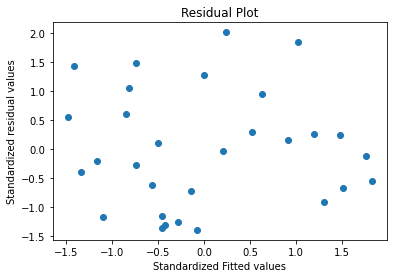

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [35]:
model.resid.mean()

6.063298011819522e-12

Inference: Through Residual plot, it seems the residual are scatter equally which means the variance is constant, and also the mean of residual is zero So the Y Variable is indeed has Homoscedasticity effect and not Heteroscedasticity effect

#### Predict for new data point

In [36]:
#Predict for 200 and 300 daily circulation
newdata=pd.DataFrame(np.array([12.0,14.5]),columns = ["YearsExperience"])
newdata

,YearsExperience
0,12.0
1,14.5


In [37]:
#Predicting 
model.predict(newdata)

0    139191.748056
1    162816.653860
dtype: float64

Inference: 

For 12.0 YearsExperience, Salary_hike will be 139191.74

For 14.6 YearsExperience, Salary_hike will be 162816.65

#### Manually  Calculating and Checking the regression equation of the model

In [38]:
# Y = B0 + B1X

#B0 = 25792.2 - from Build model
#B1 = 9449.96 - from Build model
#X = 14.5   - Datapoint to Predict

Y = 25792.2 + 9449.96*14.5
Y

162816.62

Inference:

Manually Also Its gives the approx the Same results as the Regression equation built by the Model